Predicting the electrical energy output of a Combined Cycle Power Plant using machine learning models


In [2]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Task Identification: Regression Problem
- Target Variable Type: Continuous
- Target Variable: Net hourly electrical energy output
- Feature Selection: Temperature, Ambient Pressure, Relative Humidity, Exhaust Vacuum
- Algorithm Choice: Linear Regression, Random Forest Regression, XGBoost

In [21]:
df = pd.read_csv("https://storage.googleapis.com/aipi_datasets/CCPP_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [13]:
from sklearn.model_selection import train_test_split

# Splitting the data into features and target variable
X = df[['AT', 'AP', 'RH', 'V']]
y = df['PE']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
##Model Training

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Fit models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

In [16]:
# Define a function to evaluate models
def evaluate_model(predictions, actual):
    mae = mean_absolute_error(actual, predictions)
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    r2 = r2_score(actual, predictions)
    return mae, rmse, r2

# Evaluate each model
lr_mae, lr_rmse, lr_r2 = evaluate_model(lr_predictions, y_test)
rf_mae, rf_rmse, rf_r2 = evaluate_model(rf_predictions, y_test)
xgb_mae, xgb_rmse, xgb_r2 = evaluate_model(xgb_predictions, y_test)

# Print performance
print("Linear Regression Performance: MAE =", lr_mae, "RMSE =", lr_rmse, "R² =", lr_r2)
print("Random Forest Performance: MAE =", rf_mae, "RMSE =", rf_rmse, "R² =", rf_r2)
print("XGBoost Performance: MAE =", xgb_mae, "RMSE =", xgb_rmse, "R² =", xgb_r2)

Linear Regression Performance: MAE = 3.595913178273408 RMSE = 4.502633229532186 R² = 0.9301046431962188
Random Forest Performance: MAE = 2.3277773249738707 RMSE = 3.2435915745766297 R² = 0.9637283335356601
XGBoost Performance: MAE = 2.190387904885669 RMSE = 3.0195901956515727 R² = 0.9685651642734947


In [19]:
from sklearn.model_selection import cross_val_score

# Define a function for cross-validation
def perform_cross_validation(model, X, y, cv=5, scoring='neg_mean_absolute_error'):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    return -scores.mean(), scores.std()

# Linear Regression
lr_cv_mae, lr_cv_std = perform_cross_validation(lr_model, X, y)
print(f"Linear Regression - Avg MAE: {lr_cv_mae}, Std: {lr_cv_std}")

# Random Forest
rf_cv_mae, rf_cv_std = perform_cross_validation(rf_model, X, y)
print(f"Random Forest - Avg MAE: {rf_cv_mae}, Std: {rf_cv_std}")

# XGBoost
xgb_cv_mae, xgb_cv_std = perform_cross_validation(xgb_model, X, y)
print(f"XGBoost - Avg MAE: {xgb_cv_mae}, Std: {xgb_cv_std}")


Linear Regression - Avg MAE: 3.6276598032668077, Std: 0.04689132496359573
Random Forest - Avg MAE: 2.349174301323891, Std: 0.06684321198391521
XGBoost - Avg MAE: 2.2310986400768775, Std: 0.05736084200599516


In [20]:
# Choose the best model based on validation performance
# For example, let's assume RandomForest performed best
final_model = xgb_model

# Evaluate on the test set
final_predictions = final_model.predict(X_test)
final_mae, final_rmse, final_r2 = evaluate_model(final_predictions, y_test)
print("Final Model Performance on Test Set: MAE =", final_mae, "RMSE =", final_rmse, "R² =", final_r2)

Final Model Performance on Test Set: MAE = 2.190387904885669 RMSE = 3.0195901956515727 R² = 0.9685651642734947


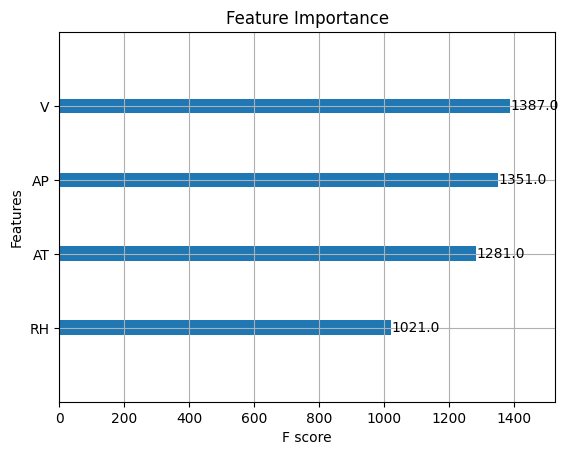

In [27]:
# Feature Importance Plot
xgb.plot_importance(xgb_model)
plt.title('Feature Importance')
plt.show()
